### 0. Libraray

In [ ]:
pip install scikit-learn-extra

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from collections import Counter
from matplotlib import font_manager, rc

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 1. Data

In [ ]:
path = "C:\\Users\\SOHYEUN\\Desktop\\BOAZ_광진구\\광진구_최종\\QGIS\\행정동\\"

dong_names = ['화양동', '군자동', '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '구의1동', '구의2동', 
              '구의3동', '광장동', '자양1동', '자양2동', '자양3동', '자양4동']

dong_dfs = {}

for dong in dong_names:
    dong_dfs[dong] = pd.read_csv(path + f"{dong}.csv")

pop_df = pd.read_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_광진구\\광진구_최종\\유동인구.csv', encoding='cp949')
tow_df = pd.read_csv('C:\\Users\\SOHYEUN\\Desktop\\BOAZ_광진구\\광진구_최종\\견인횟수.csv', encoding='cp949')

### 2. Data Preprocessing

In [ ]:
# Merge population data
for dong in dong_dfs:
    dong_dfs[dong] = pd.merge(dong_dfs[dong], pop_df, on=['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index'], how='left')

# Merge towing data
for dong in dong_dfs:
    dong_dfs[dong] = pd.merge(dong_dfs[dong], tow_df, on=['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index'], how='left')

# Rename columns
for dong in dong_dfs:
    dong_dfs[dong].rename(columns={'NUMPOINTS_x': '유동인구', 'NUMPOINTS_y': '견인횟수'}, inplace=True)

In [ ]:
hwayang_df = dong_dfs['화양동']
gunja_df = dong_dfs['군자동']
junggok1_df = dong_dfs['중곡1동']
junggok2_df = dong_dfs['중곡2동']
junggok3_df = dong_dfs['중곡3동']
junggok4_df = dong_dfs['중곡4동']
neung_df = dong_dfs['능동']
guui1_df = dong_dfs['구의1동']
guui2_df = dong_dfs['구의2동']
guui3_df = dong_dfs['구의3동']
gwangjang_df = dong_dfs['광장동']
jayang1_df = dong_dfs['자양1동']
jayang2_df = dong_dfs['자양2동']
jayang3_df = dong_dfs['자양3동']
jayang4_df = dong_dfs['자양4동']

hwayang_df.head()

,id,left,top,right,bottom,row_index,col_index,유동인구,견인횟수
0,1575,963127.057290,1.949235e+06,963242.527344,1.949135e+06,35,27,323.728395,1.0
1,1404,962867.249669,1.949285e+06,962982.719723,1.949185e+06,35,24,0.000000,0.0
2,1405,962867.249669,1.949185e+06,962982.719723,1.949085e+06,36,24,0.000000,0.0
3,1406,962867.249669,1.949085e+06,962982.719723,1.948985e+06,37,24,0.000000,0.0
4,1407,962867.249669,1.948985e+06,962982.719723,1.948885e+06,38,24,0.000000,0.0


In [ ]:
# Calculate center point for each district
for dong, df in {'화양동': hwayang_df, '군자동': gunja_df, '중곡1동': junggok1_df, '중곡2동': junggok2_df, 
                 '중곡3동': junggok3_df, '중곡4동': junggok4_df, '능동': neung_df, '구의1동': guui1_df, 
                 '구의2동': guui2_df, '구의3동': guui3_df, '광장동': gwangjang_df, '자양1동': jayang1_df, 
                 '자양2동': jayang2_df, '자양3동': jayang3_df, '자양4동': jayang4_df}.items():
    df['centroid_x'] = (df['left'] + df['right']) / 2
    df['centroid_y'] = (df['top'] + df['bottom']) / 2
    df.drop(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index'], axis=1, inplace=True)

In [ ]:
# Calculate the min and max values
districts = {
    '화양동': hwayang_df,
    '군자동': gunja_df,
    '중곡1동': junggok1_df,
    '중곡2동': junggok2_df,
    '중곡3동': junggok3_df,
    '중곡4동': junggok4_df,
    '능동': neung_df,
    '구의1동': guui1_df,
    '구의2동': guui2_df,
    '구의3동': guui3_df,
    '광장동': gwangjang_df,
    '자양1동': jayang1_df,
    '자양2동': jayang2_df,
    '자양3동': jayang3_df,
    '자양4동': jayang4_df
}

min_max_values = {}

for dong, df in districts.items():
    min_max_values[dong] = {
        '유동인구_min': df['유동인구'].min(),
        '유동인구_max': df['유동인구'].max(),
        '견인횟수_min': df['견인횟수'].min(),
        '견인횟수_max': df['견인횟수'].max()
    }

for dong, values in min_max_values.items():
    print(f"{dong}:")
    print(f"유동인구 최솟값: {values['유동인구_min']}, 유동인구 최댓값: {values['유동인구_max']}")
    print(f"견인횟수 최솟값: {values['견인횟수_min']}, 견인횟수 최댓값: {values['견인횟수_max']}")
    print()

화양동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 110695.53782051284
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 128.0

군자동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 53941.0
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 220.0

중곡1동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 53941.0
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 38.0

중곡2동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 53941.0
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 47.0

중곡3동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 22149.172665569724
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 47.0

중곡4동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 632.7314814814815
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 40.0

능동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 53941.0
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 220.0

구의1동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 50763.0
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 108.0

구의2동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 32546.599002849005
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 33.0

구의3동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 60830.07692307692
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 108.0

광장동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 28970.47150997151
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 22.0

자양1동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 937.0833333333331
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 44.0

자양2동:
유동인구 최솟값: 0.0, 유동인구 최댓값: 50763.0
견인횟수 최솟값: 0.0, 견인횟수 최댓값: 108.0

자양3동:
유동인구 최솟값: 

### 3. Data Analysis

In [ ]:
# Apply the scaler to '유동인구' and '견인횟수' columns
scaler = MinMaxScaler()

for district, df in districts.items():
    df['유동인구'] = scaler.fit_transform(df[['유동인구']].values.reshape(-1, 1))
    df['견인횟수'] = scaler.fit_transform(df[['견인횟수']].values.reshape(-1, 1))

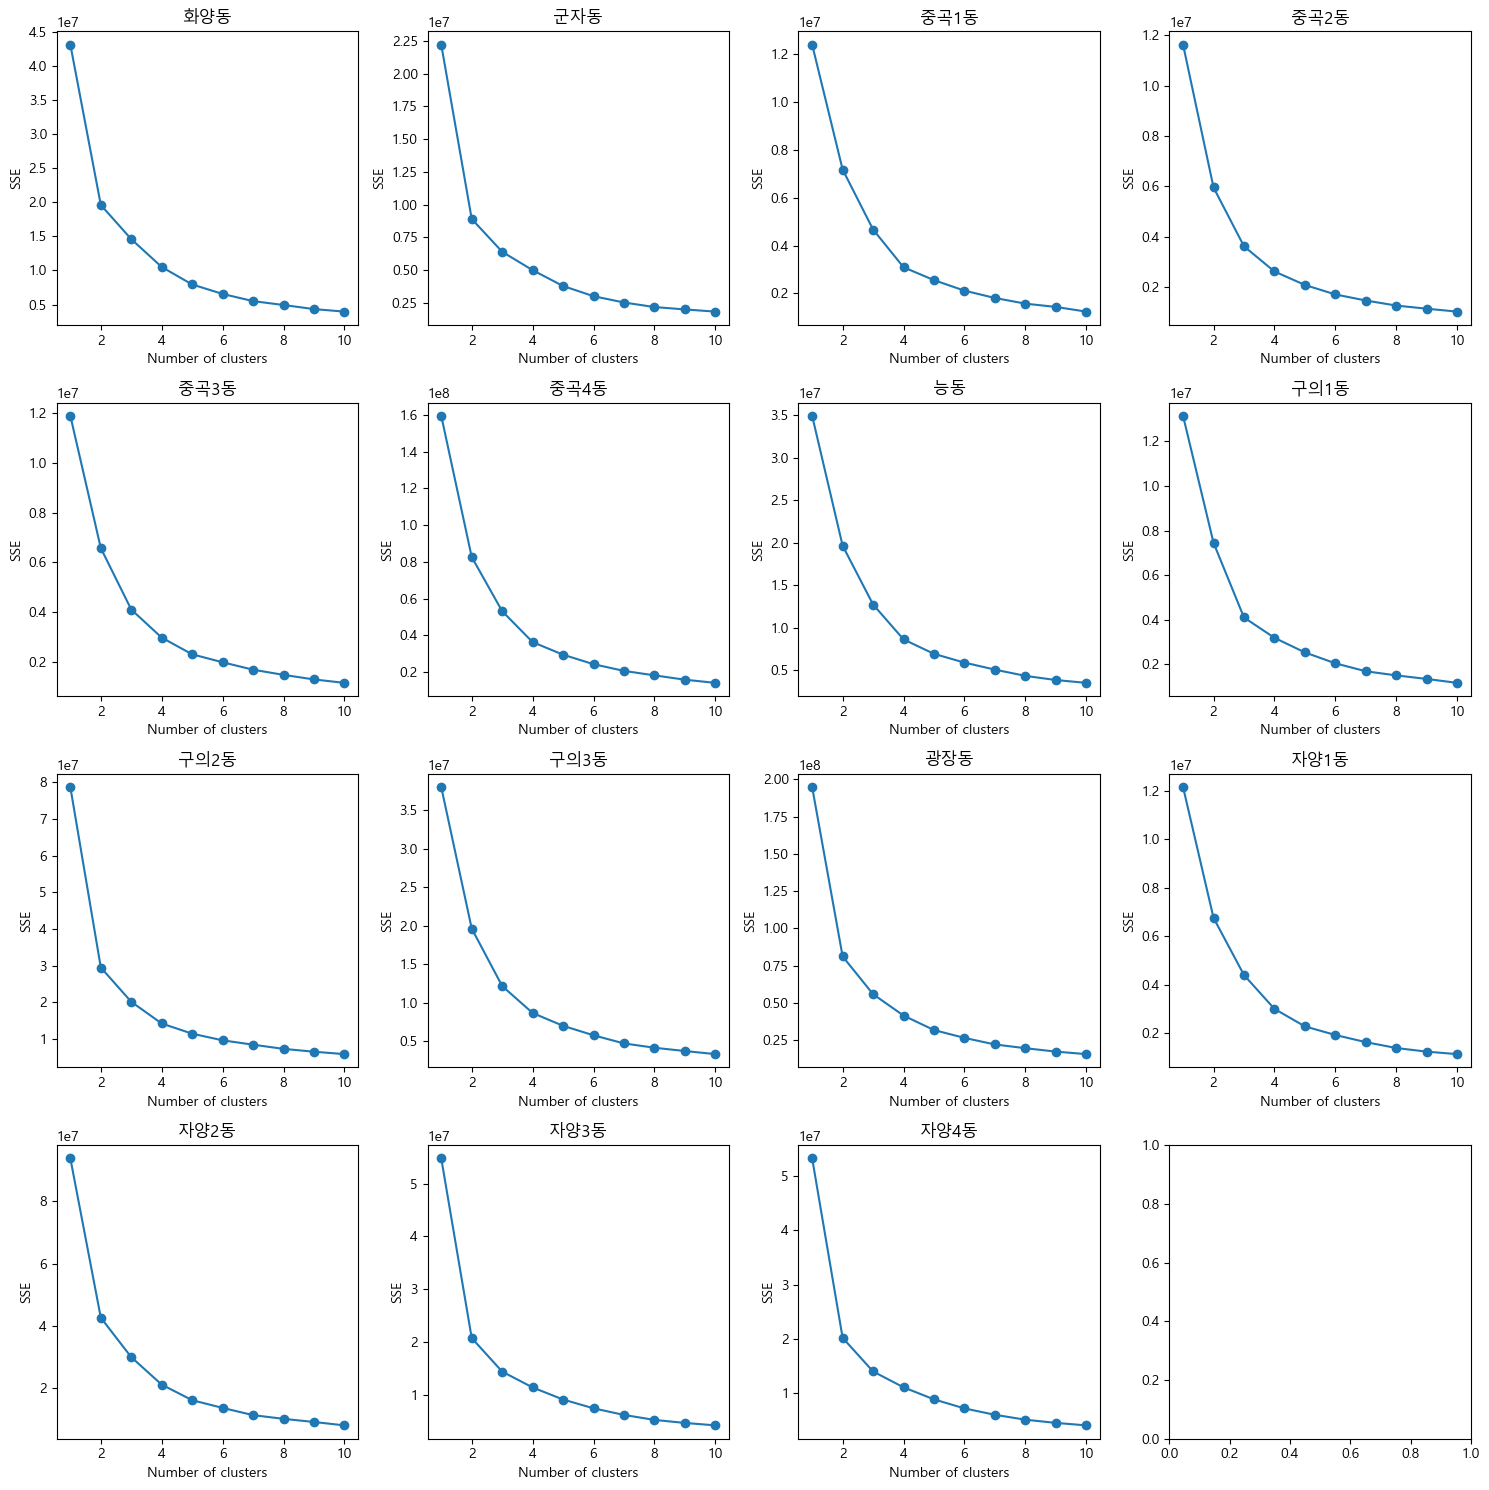

In [ ]:
# Apply KMeans model and calculate SSE for each district
sse_per_dong = {}

for dong, df in districts.items():
    sse_per_dong[dong] = [KMeans(n_clusters=k, random_state=0).fit(df).inertia_ for k in range(1, 11)]


# Plot SSE for each district
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, (dong, sse_values) in enumerate(sse_per_dong.items()):
    row, col = divmod(i, 4)
    axs[row, col].plot(range(1, 11), sse_values, marker='o')
    axs[row, col].set_title(dong)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('SSE')

plt.tight_layout()
plt.show()

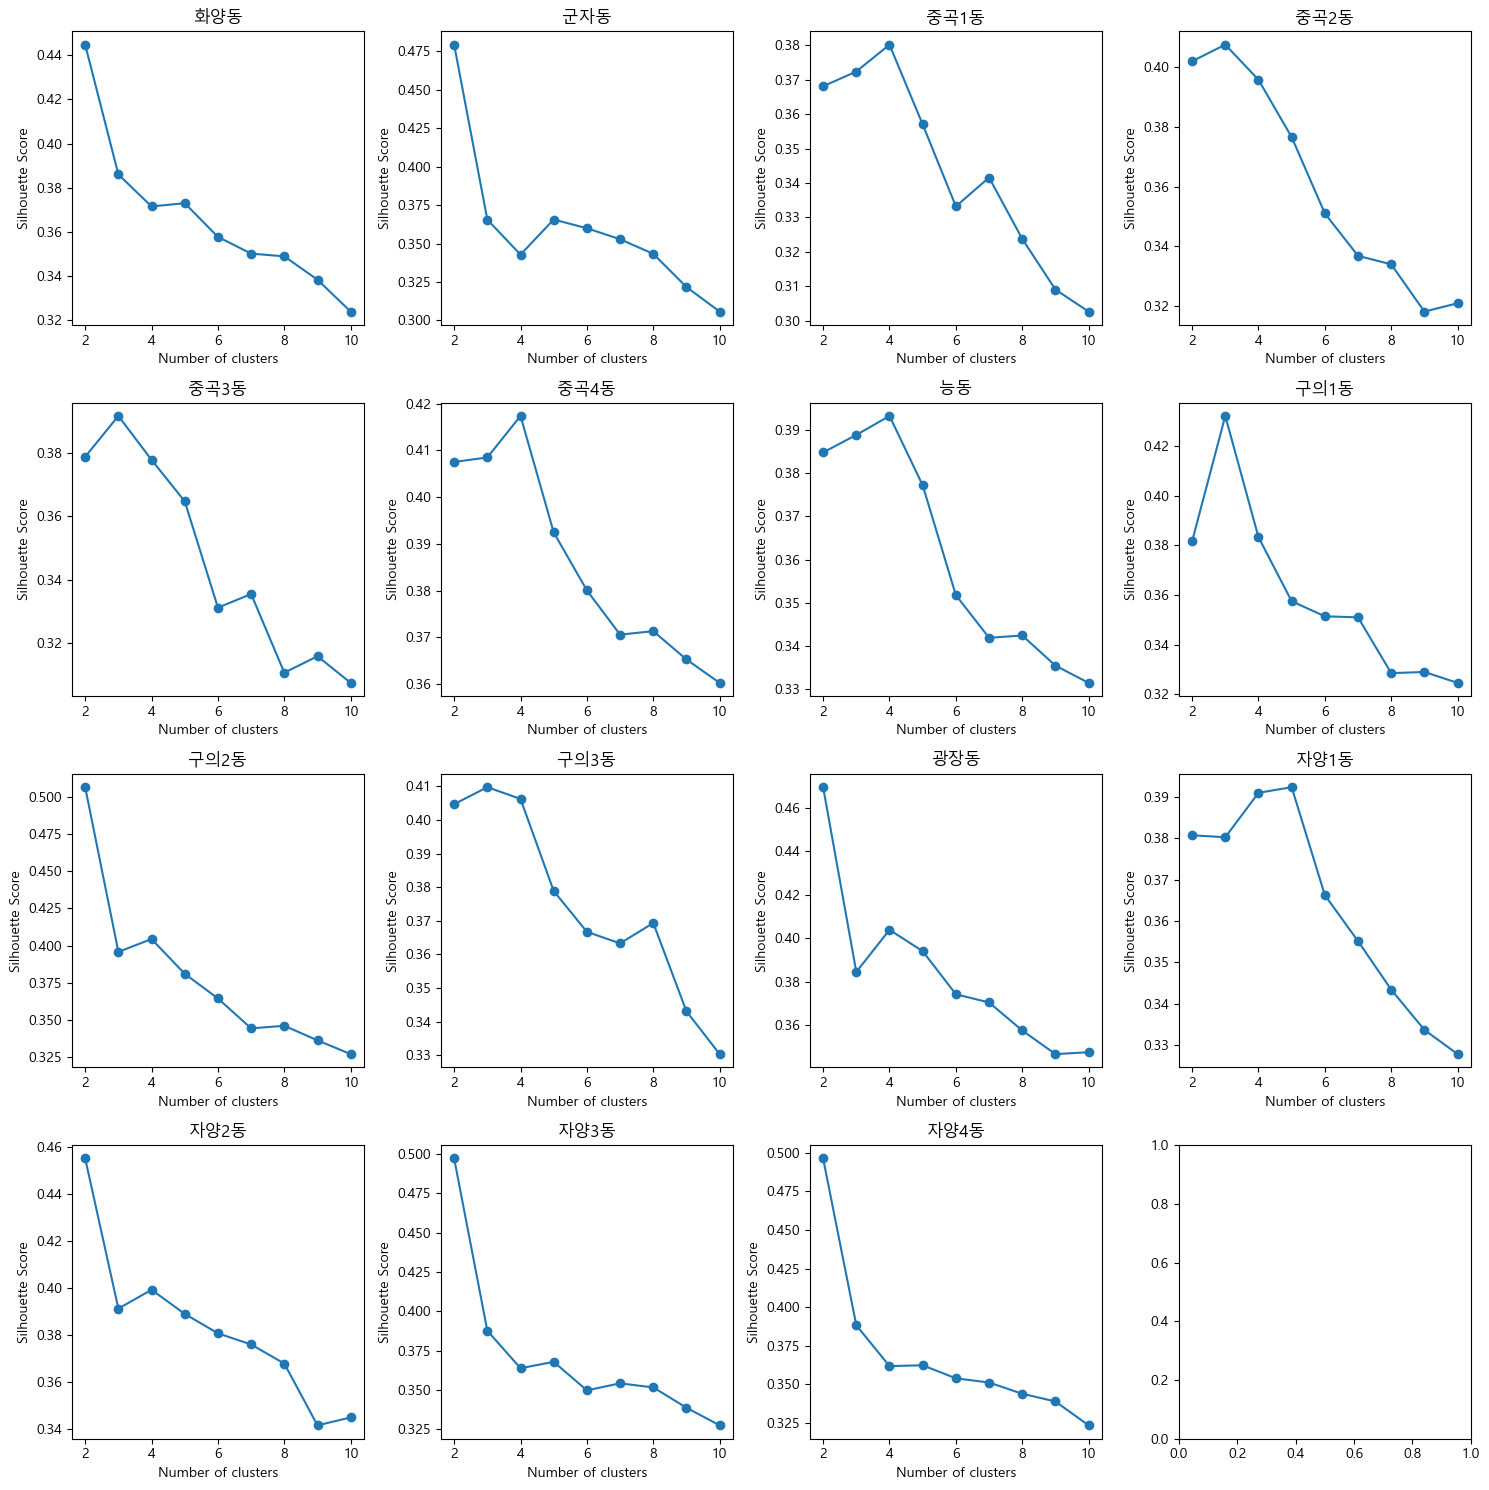

In [ ]:
# Perform silhouette analysis for each district
silhouette_per_dong = {}

for dong, df in districts.items():
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(df)
        score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(score)
    silhouette_per_dong[dong] = silhouette_scores

# Plot silhouette scores for each district
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, (dong, silhouette_values) in enumerate(silhouette_per_dong.items()):
    row, col = divmod(i, 4)
    axs[row, col].plot(range(2, 11), silhouette_values, marker='o')
    axs[row, col].set_title(dong)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
# Add cluster labels to each district DataFrame
clustered_dfs = {}

for dong, df in districts.items():
    if dong in ['중곡1동', '중곡4동', '능동', '자양1동', '자양2동']:
        n_clusters = 4
    elif dong in ['중곡2동', '중곡3동', '구의1동', '구의3동']:
        n_clusters = 3
    else:
        n_clusters = 2
    
    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(df)
    df['kmeans_label'] = kmeans_labels
    
    # K-medoids clustering
    kmedoids = KMedoids(n_clusters=n_clusters)
    kmedoids_labels = kmedoids.fit_predict(df)
    df['kmedoids_label'] = kmedoids_labels
    
    # Hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(df)
    df['hierarchical_label'] = hierarchical_labels
    
    # Gaussian Mixture clustering
    gmm = GaussianMixture(n_components=n_clusters)
    gmm_labels = gmm.fit_predict(df)
    df['gmm_label'] = gmm_labels
    
    clustered_dfs[dong] = df

In [ ]:
# Perform inverse normalization for each district
for dong, df in clustered_dfs.items():
    df['유동인구'] = df['유동인구'] * (min_max_values[dong]['유동인구_max'] - min_max_values[dong]['유동인구_min']) + min_max_values[dong]['유동인구_min']
    df['견인횟수'] = df['견인횟수'] * (min_max_values[dong]['견인횟수_max'] - min_max_values[dong]['견인횟수_min']) + min_max_values[dong]['견인횟수_min']

    clustered_dfs[dong] = df

In [ ]:
# Calculate the mean of clustering results for each district
kmeans_cluster_means_per_dong = {}
kmedoids_cluster_means_per_dong = {}
hierarchical_cluster_means_per_dong = {}
gmm_cluster_means_per_dong = {}

for dong, df in clustered_dfs.items():
    kmeans_cluster_means_per_dong[dong] = df.groupby('kmeans_label')[['유동인구', '견인횟수']].mean()
    kmedoids_cluster_means_per_dong[dong] = df.groupby('kmedoids_label')[['유동인구', '견인횟수']].mean()
    hierarchical_cluster_means_per_dong[dong] = df.groupby('hierarchical_label')[['유동인구', '견인횟수']].mean()
    gmm_cluster_means_per_dong[dong] = df.groupby('gmm_label')[['유동인구', '견인횟수']].mean()

for dong in clustered_dfs.keys():
    print(f"{dong} 클러스터링 결과의 평균:")
    print("K-means:")
    print(kmeans_cluster_means_per_dong[dong])
    print("\nK-medoids:")
    print(kmedoids_cluster_means_per_dong[dong])
    print("\nHierarchical:")
    print(hierarchical_cluster_means_per_dong[dong])
    print("\nGaussian Mixture:")
    print(gmm_cluster_means_per_dong[dong])
    print()

화양동 클러스터링 결과의 평균:
K-means:
                     유동인구       견인횟수
kmeans_label                        
0               21.288965   1.358025
1             1394.704994  10.487805

K-medoids:
                       유동인구       견인횟수
kmedoids_label                        
0                 21.555077   1.362500
1               1377.901319  10.373494

Hierarchical:
                           유동인구      견인횟수
hierarchical_label                       
0                   1155.210197  8.959596
1                     26.943846  1.296875

Gaussian Mixture:
                  유동인구       견인횟수
gmm_label                        
0            21.555077   1.362500
1          1377.901319  10.373494

군자동 클러스터링 결과의 평균:
K-means:
                     유동인구       견인횟수
kmeans_label                        
0             1050.535579  16.222222
1              738.535561  10.192982

K-medoids:
                       유동인구       견인횟수
kmedoids_label                        
0                738.535561  10.192982
1             

In [ ]:
# Changing the kmedoids_label, kmedoids_label, ierarchical_label, gmm_label values
#화양동 
kmedoids_replacement_dict = {1: 0, 0: 1}
hwayang_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

#군자동
kmeans_replacement_dict = {1: 0, 0:1}
gunja_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {1: 0, 0: 1}
gunja_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

#중곡 1동 
kmeans_replacement_dict = {3: 0, 0: 1, 1: 2, 2: 3}
junggok1_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {2: 0, 1: 1, 0: 2, 3: 3}
junggok1_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict = {3: 0, 0: 1, 2: 2, 1: 3}
junggok1_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict = {1: 0, 0: 1, 2: 2, 1: 3}
junggok1_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#중곡2동 
kmeans_replacement_dict = {0: 0, 2: 1, 1: 2}
junggok2_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

hierarchical_replacement_dict = {1: 0, 0: 1, 2: 2}
junggok2_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict = {2: 0, 1: 1, 0: 2}
junggok2_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#중곡 3동
kmeans_replacement_dict = {1: 0, 2: 1, 0: 2}
junggok3_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {0: 0, 2: 1, 1: 2}
junggok3_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

#중곡4동
kmeans_replacement_dict = {0: 0, 3: 1, 2: 2, 1: 3}
junggok4_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {0: 0, 2: 1, 1: 2, 3: 3}
junggok4_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict = {0: 0, 2: 1, 1: 2, 2: 3}
junggok4_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict = {0: 0, 2: 1, 3: 2, 1: 3}
junggok4_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)    

#능동
kmeans_replacement_dict = {3: 0, 1: 1, 0: 2, 2: 3}
neung_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {3: 0, 0: 1, 2: 2, 1: 3}
neung_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict = {2: 0, 3: 1, 0: 2, 1: 3}
neung_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

#구의 1동
kmeans_replacement_dict = {1: 0, 0: 1, 2: 2}
guui1_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict =  {1: 0, 2: 1, 0: 2}
guui1_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict = {1: 0, 0: 1, 2: 2}
guui1_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict =  {2: 0, 0: 1, 1: 2}
guui1_df['gmm_label'].replace(gmm_replacement_dict, inplace=True) 

#구의 2동 
kmedoids_replacement_dict = {1: 0, 0: 1}
guui2_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

gmm_replacement_dict = {1: 0, 0: 1}
guui2_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#구의3동
kmeans_replacement_dict = {1: 0, 0: 1, 2: 2}
guui3_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {1: 0, 2: 1, 0: 2}
guui3_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

gmm_replacement_dict =  {1: 0, 0: 1, 2: 2}
guui3_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#광장동
hierarchical_replacement_dict = {1: 0, 0: 1}
gwangjang_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

#자양1동
kmeans_replacement_dict = {2: 0, 0: 1, 3: 2, 1: 3}
jayang1_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {2: 0, 0: 1, 1: 2, 3: 3}
jayang1_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict ={2: 0, 1: 1, 0: 2, 0: 3}
jayang1_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict = {0: 0, 2: 1, 3: 2, 1: 3}
jayang1_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#자양2동
kmeans_replacement_dict = {1: 0, 3: 1, 0: 2, 2: 3}
jayang2_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {1: 0, 0: 1, 2: 2, 3: 3}
jayang2_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict ={3: 0, 2: 1, 1: 2, 0: 3}
jayang2_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict = {0: 0, 2: 1, 1: 2, 3: 3}
jayang2_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#자양 3동
kmeans_replacement_dict = {1: 0, 0: 1}
jayang3_df['kmeans_label'].replace(kmeans_replacement_dict, inplace=True)

kmedoids_replacement_dict = {1: 0, 0: 1}
jayang3_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

hierarchical_replacement_dict ={1: 0, 0: 1}
jayang3_df['hierarchical_label'].replace(hierarchical_replacement_dict, inplace=True)

gmm_replacement_dict = {1: 0, 0: 1}
jayang3_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

#자양 4동
kmedoids_replacement_dict = {1: 0, 0: 1}
jayang4_df['kmedoids_label'].replace(kmedoids_replacement_dict, inplace=True)

gmm_replacement_dict = {1: 0, 0: 1}
jayang4_df['gmm_label'].replace(gmm_replacement_dict, inplace=True)

### 4. Result

In [ ]:
hwayang_df2 = dong_dfs['화양동']
gunja_df2 = dong_dfs['군자동']
junggok1_df2 = dong_dfs['중곡1동']
junggok2_df2 = dong_dfs['중곡2동']
junggok3_df2 = dong_dfs['중곡3동']
junggok4_df2 = dong_dfs['중곡4동']
neung_df2 = dong_dfs['능동']
guui1_df2 = dong_dfs['구의1동']
guui2_df2 = dong_dfs['구의2동']
guui3_df2 = dong_dfs['구의3동']
gwangjang_df2 = dong_dfs['광장동']
jayang1_df2 = dong_dfs['자양1동']
jayang2_df2 = dong_dfs['자양2동']
jayang3_df2 = dong_dfs['자양3동']
jayang4_df2 = dong_dfs['자양4동']

In [ ]:
# Calculate center point for each district
for dong, df in {'화양동': hwayang_df2, '군자동': gunja_df2, '중곡1동': junggok1_df2, '중곡2동': junggok2_df2, 
                 '중곡3동': junggok3_df2, '중곡4동': junggok4_df2, '능동': neung_df2, '구의1동': guui1_df2, 
                 '구의2동': guui2_df2, '구의3동': guui3_df2, '광장동': gwangjang_df2, '자양1동': jayang1_df2, 
                 '자양2동': jayang2_df2, '자양3동': jayang3_df2, '자양4동': jayang4_df2}.items():
    df['centroid_x'] = (df['left'] + df['right']) / 2
    df['centroid_y'] = (df['top'] + df['bottom']) / 2
    df.drop(['left', 'top', 'right', 'bottom', 'row_index', 'col_index'], axis=1, inplace=True)

In [ ]:
# Merge each pair of DataFrames
districts = [
    'hwayang', 'gunja', 'junggok1', 'junggok2', 'junggok3', 'junggok4',
    'neung', 'guui1', 'guui2', 'guui3', 'gwangjang', 'jayang1', 'jayang2', 
    'jayang3', 'jayang4'
]

for district in districts:
    df = globals()[f'{district}_df']
    df2 = globals()[f'{district}_df2']

    merged_df = pd.merge(df, df2, on=['centroid_x', 'centroid_y'], how='left')
    
    globals()[f'{district}_df'] = merged_df

In [ ]:
# Save DataFrames for each district to a CSV file
for dong, df in {'화양동': hwayang_df, '군자동': gunja_df, '중곡1동': junggok1_df, '중곡2동': junggok2_df, 
                 '중곡3동': junggok3_df, '중곡4동': junggok4_df, '능동': neung_df, '구의1동': guui1_df, 
                 '구의2동': guui2_df, '구의3동': guui3_df, '광장동': gwangjang_df, '자양1동': jayang1_df, 
                 '자양2동': jayang2_df, '자양3동': jayang3_df, '자양4동': jayang4_df}.items():
    file_path = f"C:\\Users\\SOHYEUN\\Desktop\\BOAZ_광진구\\광진구_최종\\최종클러스터링\\{dong}_클러스터링.csv"
    df.to_csv(file_path, index=False)
    print(f"{dong} 데이터프레임이 {file_path}에 저장되었습니다.")

화양동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\화양동_클러스터링.csv에 저장되었습니다.
군자동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\군자동_클러스터링.csv에 저장되었습니다.
중곡1동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\중곡1동_클러스터링.csv에 저장되었습니다.
중곡2동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\중곡2동_클러스터링.csv에 저장되었습니다.
중곡3동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\중곡3동_클러스터링.csv에 저장되었습니다.
중곡4동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\중곡4동_클러스터링.csv에 저장되었습니다.
능동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\능동_클러스터링.csv에 저장되었습니다.
구의1동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\구의1동_클러스터링.csv에 저장되었습니다.
구의2동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\구의2동_클러스터링.csv에 저장되었습니다.
구의3동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\구의3동_클러스터링.csv에 저장되었습니다.
광장동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링\광장동_클러스터링.csv에 저장되었습니다.
자양1동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종

In [ ]:
# Function to calculate the mode for each row with tie-breaking options
def row_mode_with_tie_breaking(row, mode_type='min'):
    counter = Counter(row)
    mode_values = counter.most_common()
    max_count = mode_values[0][1]  # The highest count of occurrences
    max_value = [value for value, count in mode_values if count == max_count]  # List of values with the highest occurrences
    
    if mode_type == 'min':
        return min(max_value) if max_value else None  # Return the smallest value among the most frequent
    elif mode_type == 'max':
        return max(max_value) if max_value else None  # Return the largest value among the most frequent
    elif mode_type == 'mean':
        return sum(max_value) / len(max_value) if max_value else None  # Return the mean of the most frequent values

In [ ]:
# Function to calculate cluster statistics
def calculate_cluster_statistics(df):
    df['최종_클러스터링(평균)'] = df[['kmeans_label', 'kmedoids_label', 'hierarchical_label', 'gmm_label']].mean(axis=1)
        
    # Apply mode calculation with tie-breaking options
    min_mode = df[['kmeans_label', 'kmedoids_label', 'hierarchical_label', 'gmm_label']].apply(row_mode_with_tie_breaking, mode_type='min', axis=1)
    max_mode = df[['kmeans_label', 'kmedoids_label', 'hierarchical_label', 'gmm_label']].apply(row_mode_with_tie_breaking, mode_type='max', axis=1)
    mean_mode = df[['kmeans_label', 'kmedoids_label', 'hierarchical_label', 'gmm_label']].apply(row_mode_with_tie_breaking, mode_type='mean', axis=1)

    df['최종_클러스터링(최빈값_min)'] = min_mode
    df['최종_클러스터링(최빈값_max)'] = max_mode
    df['최종_클러스터링(최빈값_mean)'] = mean_mode

# Apply the function to each district DataFrame
calculate_cluster_statistics(hwayang_df)
calculate_cluster_statistics(gunja_df)
calculate_cluster_statistics(junggok1_df)
calculate_cluster_statistics(junggok2_df)
calculate_cluster_statistics(junggok3_df)
calculate_cluster_statistics(junggok4_df)
calculate_cluster_statistics(neung_df)
calculate_cluster_statistics(guui1_df)
calculate_cluster_statistics(guui2_df)
calculate_cluster_statistics(guui3_df)
calculate_cluster_statistics(gwangjang_df)
calculate_cluster_statistics(jayang1_df)
calculate_cluster_statistics(jayang2_df)
calculate_cluster_statistics(jayang3_df)
calculate_cluster_statistics(jayang4_df)

In [ ]:
dongs = [
    ("화양동", hwayang_df),
    ("군자동", gunja_df),
    ("중곡1동", junggok1_df),
    ("중곡2동", junggok2_df),
    ("중곡3동", junggok3_df),
    ("중곡4동", junggok4_df),
    ("능동", neung_df),
    ("구의1동", guui1_df),
    ("구의2동", guui2_df),
    ("구의3동", guui3_df),
    ("광장동", gwangjang_df),
    ("자양1동", jayang1_df),
    ("자양2동", jayang2_df),
    ("자양3동", jayang3_df),
    ("자양4동", jayang4_df)
]

# Apply the function to each district DataFrame
for dong, df in dongs:
    calculate_cluster_statistics(df)

for dong, df in dongs:
    print(f"{dong} 행정동:")
    print(df['최종_클러스터링(평균)'].value_counts().sort_index(ascending=True))
    print(df['최종_클러스터링(최빈값_min)'].value_counts().sort_index(ascending=True))
    print(df['최종_클러스터링(최빈값_max)'].value_counts().sort_index(ascending=True))
    print(df['최종_클러스터링(최빈값_mean)'].value_counts().sort_index(ascending=True))
    print()


화양동 행정동:
0.00    16
0.25    64
0.50     1
0.75    82
Name: 최종_클러스터링(평균), dtype: int64
0    81
1    82
Name: 최종_클러스터링(최빈값_min), dtype: int64
0    80
1    83
Name: 최종_클러스터링(최빈값_max), dtype: int64
0.0    80
0.5     1
1.0    82
Name: 최종_클러스터링(최빈값_mean), dtype: int64

군자동 행정동:
0.25    54
0.50     2
0.75    55
Name: 최종_클러스터링(평균), dtype: int64
0    56
1    55
Name: 최종_클러스터링(최빈값_min), dtype: int64
0    54
1    57
Name: 최종_클러스터링(최빈값_max), dtype: int64
0.0    54
0.5     2
1.0    55
Name: 최종_클러스터링(최빈값_mean), dtype: int64

중곡1동 행정동:
0.50     6
1.25    40
1.50     1
1.75     6
2.00    21
2.25    19
Name: 최종_클러스터링(평균), dtype: int64
0    10
1    23
2    24
3    36
Name: 최종_클러스터링(최빈값_min), dtype: int64
0     9
1    17
2    24
3    43
Name: 최종_클러스터링(최빈값_max), dtype: int64
0.0     9
1.0    17
1.5     1
2.0    30
3.0    36
Name: 최종_클러스터링(최빈값_mean), dtype: int64

중곡2동 행정동:
0.75    27
1.00    27
1.25    28
1.50     2
Name: 최종_클러스터링(평균), dtype: int64
0    27
1    29
2    28
Name: 최종_클러스터링(최빈값_min), dtype: i

In [27]:
# 각 행정동에 대해 데이터프레임을 CSV 파일로 저장
for dong, df in {'화양동': hwayang_df, '군자동': gunja_df, '중곡1동': junggok1_df, '중곡2동': junggok2_df, 
                 '중곡3동': junggok3_df, '중곡4동': junggok4_df, '능동': neung_df, '구의1동': guui1_df, 
                 '구의2동': guui2_df, '구의3동': guui3_df, '광장동': gwangjang_df, '자양1동': jayang1_df, 
                 '자양2동': jayang2_df, '자양3동': jayang3_df, '자양4동': jayang4_df}.items():
    file_path = f"C:\\Users\\SOHYEUN\\Desktop\\BOAZ_광진구\\광진구_최종\\최종클러스터링(최빈값_max)\\{dong}_클러스터링.csv"
    df.to_csv(file_path, index=False)
    print(f"{dong} 데이터프레임이 {file_path}에 저장되었습니다.")

화양동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\화양동_클러스터링.csv에 저장되었습니다.
군자동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\군자동_클러스터링.csv에 저장되었습니다.
중곡1동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\중곡1동_클러스터링.csv에 저장되었습니다.
중곡2동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\중곡2동_클러스터링.csv에 저장되었습니다.
중곡3동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\중곡3동_클러스터링.csv에 저장되었습니다.
중곡4동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\중곡4동_클러스터링.csv에 저장되었습니다.
능동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\능동_클러스터링.csv에 저장되었습니다.
구의1동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\구의1동_클러스터링.csv에 저장되었습니다.
구의2동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\구의2동_클러스터링.csv에 저장되었습니다.
구의3동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진구_최종\최종클러스터링(최빈값_max)\구의3동_클러스터링.csv에 저장되었습니다.
광장동 데이터프레임이 C:\Users\SOHYEUN\Desktop\BOAZ_광진구\광진

In [ ]:
# Calculate the average towing count and floating population by mode max for each district
max_mode_tow_means = {}
max_mode_pop_means = {}

for dong, df in dongs:
    max_mode_tow_means[dong] = df.groupby('최종_클러스터링(최빈값_max)')['견인횟수'].mean()
    max_mode_pop_means[dong] = df.groupby('최종_클러스터링(최빈값_max)')['유동인구'].mean()

for dong, counts in max_mode_tow_means.items():
    print(f"{dong} 행정동:")
    print("최빈값 max별 견인횟수 평균:")
    print(counts)
    print()
    print("최빈값 max별 유동인구 평균:")
    print(max_mode_pop_means[dong])
    print()

화양동 행정동:
최빈값 max별 견인횟수 평균:
최종_클러스터링(최빈값_max)
0     1.362500
1    10.373494
Name: 견인횟수, dtype: float64

최빈값 max별 유동인구 평균:
최종_클러스터링(최빈값_max)
0      21.555077
1    1377.901319
Name: 유동인구, dtype: float64

군자동 행정동:
최빈값 max별 견인횟수 평균:
최종_클러스터링(최빈값_max)
0    16.222222
1    10.192982
Name: 견인횟수, dtype: float64

최빈값 max별 유동인구 평균:
최종_클러스터링(최빈값_max)
0    1050.535579
1     738.535561
Name: 유동인구, dtype: float64

중곡1동 행정동:
최빈값 max별 견인횟수 평균:
최종_클러스터링(최빈값_max)
0    6.555556
1    0.352941
2    1.833333
3    0.883721
Name: 견인횟수, dtype: float64

최빈값 max별 유동인구 평균:
최종_클러스터링(최빈값_max)
0    6065.202965
1      22.618902
2      58.637732
3      31.003559
Name: 유동인구, dtype: float64

중곡2동 행정동:
최빈값 max별 견인횟수 평균:
최종_클러스터링(최빈값_max)
0    0.888889
1    2.000000
2    5.333333
Name: 견인횟수, dtype: float64

최빈값 max별 유동인구 평균:
최종_클러스터링(최빈값_max)
0     107.898332
1      80.456972
2    1857.384831
Name: 유동인구, dtype: float64

중곡3동 행정동:
최빈값 max별 견인횟수 평균:
최종_클러스터링(최빈값_max)
0    3.939394
1    0.814815
2    0.172414
Name: 견인횟수, dtype